# Spatial Analysis

### Importing the libraries

In [30]:
!pip install pykrige
# !pip install geopy

In [31]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

### Loading the dataset into a pandas dataframe

In [32]:
data = pd.read_csv('/kaggle/input/spatio-project/Sub_Division_IMD_2017.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


### Data Subsetting

In this procedure, we have filtered the data set to include only the year 2016 and selected specific columns from the data set. We then performed spatial analysis on the remaining data set to obtain the latitude and longitude of each location. Using this information, we created a new dataframe containing columns for location name, latitude, longitude, year, and annual rainfall for that location.

In [33]:
india_boundary = gpd.read_file('/kaggle/input/state-boundary/State_boundary.shp')
df = pd.DataFrame(india_boundary)
df

,ST_NM,Annual_RF,geometry
0,Arunachal Pradesh,2706.90,"POLYGON ((96.08866 29.45997, 96.09428 29.45477..."
1,Assam,2266.90,"POLYGON ((95.97166 27.96254, 95.97174 27.96227..."
2,Chandigarh,398.70,"POLYGON ((76.77175 30.79498, 76.77231 30.79420..."
3,Karnataka,1310.67,"POLYGON ((77.32647 18.45884, 77.32648 18.45803..."
4,Manipur,1956.40,"POLYGON ((94.57315 25.69156, 94.57522 25.69094..."
5,Meghalaya,2266.90,"POLYGON ((91.82534 26.11950, 91.82610 26.11935..."
6,Mizoram,1956.40,"POLYGON ((92.76350 24.52122, 92.76374 24.52108..."
7,Nagaland,1956.40,"POLYGON ((95.19346 27.03584, 95.19336 27.03560..."
8,Punjab,444.00,"POLYGON ((75.83873 32.51270, 75.84163 32.51123..."
9,Rajasthan,603.80,"POLYGON ((73.97324 30.12272, 73.97508 30.12008..."


In [35]:
df = df[['ST_NM', 'Annual_RF']]
df.rename(columns = {'ST_NM':'State', 'Annual_RF':'Annual_Rainfall'}, inplace = True)
df["Year"] = 2016
df

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,State,Annual_Rainfall,Year
0,Arunachal Pradesh,2706.90,2016
1,Assam,2266.90,2016
2,Chandigarh,398.70,2016
3,Karnataka,1310.67,2016
4,Manipur,1956.40,2016
5,Meghalaya,2266.90,2016
6,Mizoram,1956.40,2016
7,Nagaland,1956.40,2016
8,Punjab,444.00,2016
9,Rajasthan,603.80,2016


In [36]:
# Install and import ArcGIS geolocator
# !pip install geopy
from geopy.geocoders import ArcGIS
geolocator = ArcGIS()

# Create empty lists to store latitudes and longitudes
latitudes = []
longitudes = []

# Loop over each location and get its latitude and longitude using geolocator
for loc in df['State']:
    location = geolocator.geocode(loc)
    if location is not None:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)

# Add the latitude and longitude columns to the data_annual dataframe
df.loc[:, 'Latitude'] = latitudes
df.loc[:, 'Longitude'] = longitudes

# Remove rows with missing values
spatial_data = df.dropna()

# Display the resulting dataframe
spatial_data

,State,Annual_Rainfall,Year,Latitude,Longitude
0,Arunachal Pradesh,2706.90,2016,28.033782,94.660358
1,Assam,2266.90,2016,26.326138,92.830075
2,Chandigarh,398.70,2016,30.703590,76.789670
3,Karnataka,1310.67,2016,14.707041,76.170276
4,Manipur,1956.40,2016,24.732530,93.883330
5,Meghalaya,2266.90,2016,25.536523,91.279611
6,Mizoram,1956.40,2016,23.307804,92.828917
7,Nagaland,1956.40,2016,26.059340,94.472049
8,Punjab,444.00,2016,30.843233,75.417667
9,Rajasthan,603.80,2016,26.585403,73.849097


In [37]:
print(spatial_data.dtypes)

State               object
Annual_Rainfall    float64
Year                 int64
Latitude           float64
Longitude          float64
dtype: object


### Loading and plotting shapefile data of India's state boundaries

We reads in a shapefile of India state boundaries using geopandas, extracts the total bounds of the shapefile, and plots the boundaries on a map using matplotlib. The resulting map is then displayed.

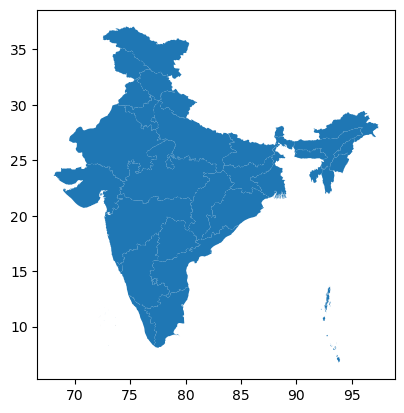

In [38]:
import geopandas as gpd
india_boundary = gpd.read_file('/kaggle/input/state-boundary/State_boundary.shp')
india_boundary.plot()
plt.show()

### Perform kriging on Annual rainfall data using ordinary kriging (OK)

We uses the Ordinary Kriging method to interpolate the rainfall data over a grid of 100x100 points covering the geographic extent of the boundary shapefile. The resulting interpolated values are plotted on a map using the colormap and overlaid with the boundary shapefile. The code generates a colorbar to represent the interpolated values.

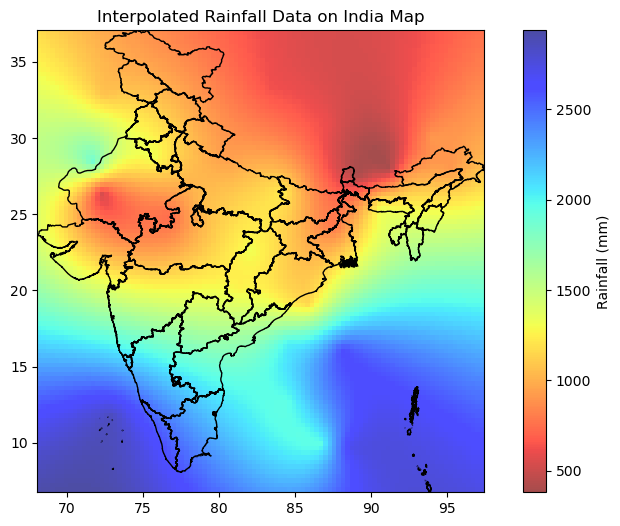

In [39]:
# Get the minimum and maximum longitude and latitude coordinates of the boundary
min_lon, min_lat, max_lon, max_lat = india_boundary.total_bounds

# Create a grid of 100x100 points spanning the minimum and maximum longitude and latitude coordinates
grid_lon = np.linspace(min_lon, max_lon, 100)
grid_lat = np.linspace(min_lat, max_lat, 100)

# Perform Ordinary Kriging interpolation on the rainfall data
rainfall_OK = OrdinaryKriging(spatial_data["Longitude"], spatial_data["Latitude"], 
                              spatial_data["Annual_Rainfall"], variogram_model="linear")

# Interpolate the rainfall data to the grid points
z, ss = rainfall_OK.execute('grid', grid_lon, grid_lat)

# Plot the interpolated rainfall data on a map with the India state boundary overlayed
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

image = ax.imshow(z.T, extent=(min_lon, max_lon, min_lat, max_lat), cmap='jet_r', alpha=0.7)
india_boundary.plot(ax=ax, edgecolor='black', facecolor='none')
cbar = fig.colorbar(image, ax=ax)
cbar.set_label("Rainfall (mm)")

plt.title("Interpolated Rainfall Data on India Map")
plt.show()

The above image demonstrates the interpolation of annual rainfall data using Ordinary Kriging and visualizing it on a map of India. The results show the spatial distribution of the interpolated rainfall values within the boundaries of the India_State_Boundary shapefile. The color map used is 'jet_r', which ranges from yellow to green to blue, indicating the interpolated rainfall values from low to high. Overall, the rainfall distribution in India in the year 2016 was quite uneven and resulted in various socio-economic and environmental impacts. In general the highest rainfall values in the northeastern region of India and the lowest values in the western and northwestern regions. The results obtained indicate a difference from the general trend, as the highest rainfall was observed in the southern sub-division of India, which contrasts with the usual pattern. There could be a few reasons why you are getting less interpolated values in the southern subdivisions: 

1. Insufficient Data: There may be fewer weather stations in the southern subdivisions, which could lead to a lack of data for interpolation. In such cases, we may need to consider using alternative data sources or techniques for interpolation.

2. Spatial Variation: The southern subdivisions may have a different rainfall pattern than the rest of the country due to topography, land use, and other factors. This spatial variation can impact the interpolation results, resulting in fewer values in the southern subdivisions.

3. Variogram Model: The choice of variogram model can also impact the interpolation results. The linear model used in the code assumes that the spatial autocorrelation between rainfall values is constant over distance. This assumption may not hold in the southern subdivisions, resulting in less accurate interpolation. You may need to try different variogram models to find one that fits the data better.


### Applying the GridSearch CV on the data for finding the best parameters

In [51]:
import numpy as np
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV

param_dict={"method": ["universal", "ordinary"],
              "variogram_model": ["linear", "power", "gaussian", "spherical"],
              "nlags": [2, 4, 6, 8, 10, 12],
              "weight": [True, False]
            }

estimator = GridSearchCV(Krige(), param_dict, verbose=True)

estimator.fit(X=spatial_data[['Longitude','Latitude']].values, y=spatial_data['Annual_Rainfall'].values)

if hasattr(estimator, 'best_score_'):
    print('best_score R² = {:.3f}'.format(estimator.best_score_))
    print('best_params = ', estimator.best_params_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points wil

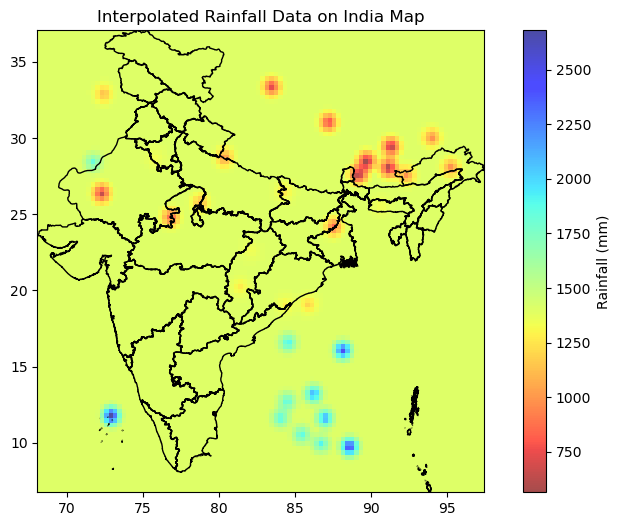

In [52]:
# Get the minimum and maximum longitude and latitude coordinates of the boundary
min_lon, min_lat, max_lon, max_lat = india_boundary.total_bounds

# Create a grid of 100x100 points spanning the minimum and maximum longitude and latitude coordinates
grid_lon = np.linspace(min_lon, max_lon, 100)
grid_lat = np.linspace(min_lat, max_lat, 100)

# Perform Ordinary Kriging interpolation on the rainfall data
rainfall_OK = OrdinaryKriging(spatial_data["Longitude"], spatial_data["Latitude"], spatial_data["Annual_Rainfall"], 
                              nlags=10, variogram_model="spherical", weight=True)

# Interpolate the rainfall data to the grid points
z, ss = rainfall_OK.execute('grid', grid_lon, grid_lat)

# Plot the interpolated rainfall data on a map with the India state boundary overlayed
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal')
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

image = ax.imshow(z.T, extent=(min_lon, max_lon, min_lat, max_lat), cmap='jet_r', alpha=0.7)
india_boundary.plot(ax=ax, edgecolor='black', facecolor='none')
cbar = fig.colorbar(image, ax=ax)
cbar.set_label("Rainfall (mm)")

plt.title("Interpolated Rainfall Data on India Map")
plt.show()

## Interpretation of Moran’s I of the rainfall data

In [42]:
merged_data=india_boundary.merge(spatial_data, left_on='ST_NM', right_on='State', how='left')
merged_data=merged_data.dropna()
merged_data.to_file('merged_data.shp')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
from sklearn.metrics.pairwise import haversine_distances
from scipy.sparse import csr_matrix

# Read in the shapefile
gdf = gpd.read_file('merged_data.shp')

### Calculating spatial autocorrelation using Moran's I and plotting the results on a map

<AxesSubplot:>

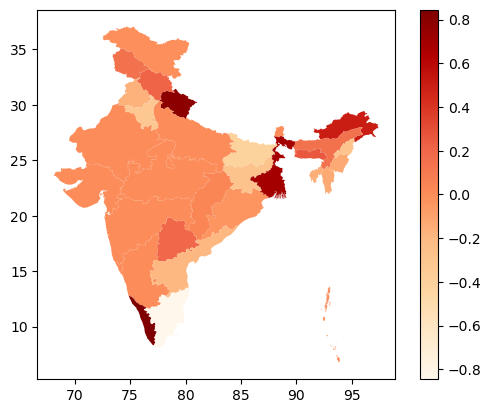

In [68]:
# Calculate the distance matrix using Haversine formula
# Convert degrees to radians
coords = np.radians(gdf[['Latitude', 'Longitude']].values)
distances = haversine_distances(coords, coords) * 6371  # Multiply by Earth's radius

# Define a function to create a spatial weights matrix
def create_w_matrix(distances, threshold):
    # Create an empty matrix
    w_matrix = np.zeros(distances.shape)
    # Iterate over each row in the distance matrix
    for i in range(distances.shape[0]):
        # Find the neighbors of the current district
        neighbors = np.where(distances[i] <= threshold)[0]
        # Set the weight to 1 if the districts are neighbors
        w_matrix[i, neighbors] = 1
    return csr_matrix(w_matrix)

# Create a spatial weights matrix using the defined function
w = create_w_matrix(distances, threshold=350)  # Set threshold to 1000 km

# Calculate the standardized values
gdf['Value_std'] = (gdf['Annual_Rai'] - gdf['Annual_Rai'].mean()) / gdf['Annual_Rai'].std()

# Calculate Moran's I for each district
n = gdf.shape[0]
morans_i = np.zeros(n)
for i in range(n):
    # Find the neighbors of the current district
    neighbors = w[i].nonzero()[1]
    # Calculate the numerator and denominator
    numerator = np.sum((gdf['Value_std'][i] - gdf['Value_std'][neighbors]).values.flatten() * w[i, neighbors].toarray().flatten())
    denominator = np.sum(w[i, neighbors])
    # Calculate Moran's I for the current district
    morans_i[i] = (numerator / denominator) / np.var(gdf['Value_std'])

# Add the results to the GeoDataFrame
gdf['Moran_I'] = morans_i   

# Plot the results 
gdf.plot(column='Moran_I', cmap='OrRd', legend=True)

The above image show a map of Moran's I values for each district in the dataset. Moran's I measures the spatial autocorrelation of a variable, which in this case is the annual rainfall values. A positive Moran's I value indicates that there is spatial clustering of high and low rainfall values, while a negative Moran's I value indicates spatial dispersion. The map shows that there are areas with high Moran's I values, indicating clustering of high and low rainfall values. This suggests that there are spatial patterns of rainfall in the study area, which could be further explored and analyzed. The map could also be used to identify areas of interest for further investigation or interventions related to water management or agriculture. 